In [ ]:
#Data Preprocessing

In [57]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
#import io
#from google.colab import files

#uploaded = files.upload()
#rm_df = pd.read_excel(io.BytesIO(uploaded['training_response_model.xlsx']))
rm_df = pd.read_excel(r"C:\Users\dominika.leszko\Desktop\NOVAIMS\SEMESTER2\Machine Learning\PROJECT\ml_project1_data.xlsx")
display(rm_df.head(3))
#print(rm_df.info(), "\nResponse rate: {}%".format(round(100*rm_df["DepVar"].mean(), 2)))

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   

  Dt_Customer  Recency  MntWines    ...     NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635    ...                     7             0   
1  2014-03-08       38        11    ...                     5             0   
2  2013-08-21       26       426    ...                     4             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  

[3 rows x 29 columns]

In [58]:
#1 Drop useless values
rm_df.drop(rm_df[(rm_df['Marital_Status']=='YOLO') | (rm_df['Marital_Status']=='Absurd')].index, axis=0, inplace=True)

In [59]:
#2 Drop constant features and ID
num_df=rm_df._get_numeric_data().drop(['Response'], axis=1)
const=list(num_df.columns[num_df.std()<0.01])
const.append('ID')
rm_df.drop(labels=const, axis=1, inplace=True)

In [60]:
#Calculate days_since_customer
def days_since(series, ref_date):
    import datetime
    ser = rm_df['Dt_Customer'].apply(lambda i:datetime.datetime.strptime(i, '%Y-%m-%d').date())
    ser = ser.apply(func = lambda x: (ref_date-x).days)    
    return ser

rm_df["DaysCustomer"] = days_since(rm_df['Dt_Customer'], datetime.date(2019,3,11))
#rm_df.loc[:, ["DaysCustomer", 'Dt_Customer']].head(3)

In [61]:
#Compute age
def _comp_age(birth):
    import datetime
    rm_df['CustAge']=datetime.datetime.now().year-rm_df['Year_Birth']

In [62]:
scale_feat=rm_df[['NumDealsPurchases','NumStorePurchases','NumCatalogPurchases', 'NumWebVisitsMonth',
                  'NumWebPurchases',
                    'Year_Birth',
                     'Income',
                     'Recency',
                     'MntWines',
                     'MntFruits',
                     'MntMeatProducts',
                     'MntFishProducts',
                     'MntSweetProducts',
                     'MntGoldProds',
                     'DaysCustomer']].columns

len(scale_feat)

15

C:\Users\dominika.leszko\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


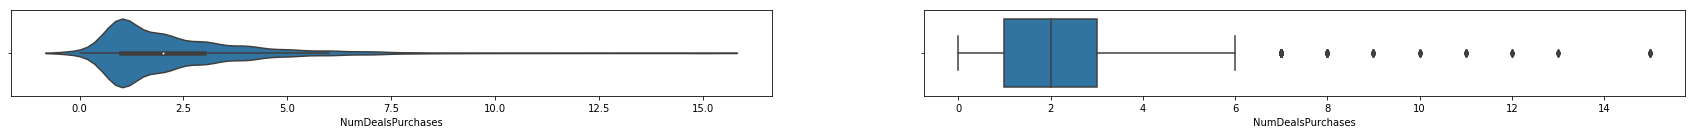

<Figure size 432x288 with 0 Axes>

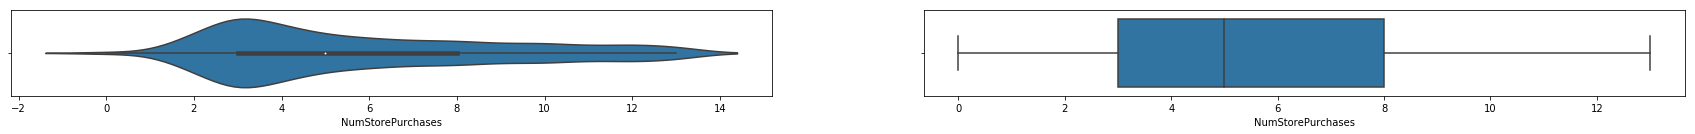

<Figure size 432x288 with 0 Axes>

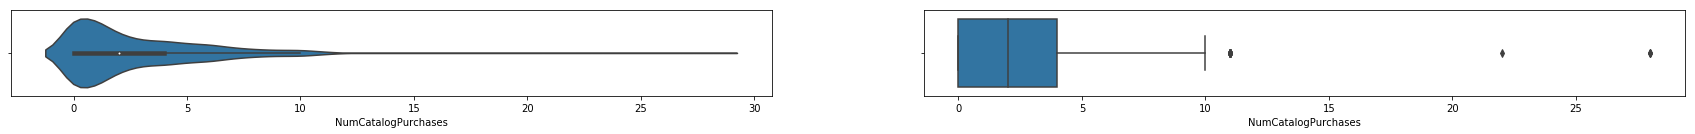

<Figure size 432x288 with 0 Axes>

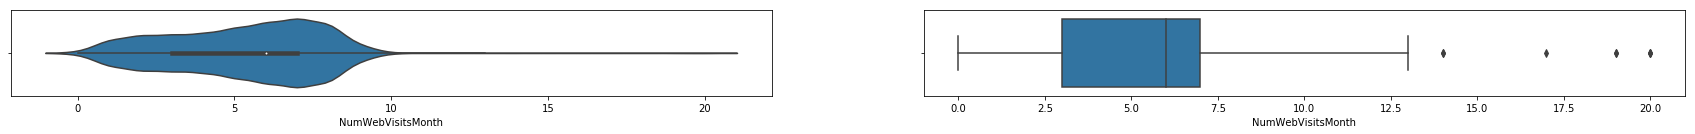

<Figure size 432x288 with 0 Axes>

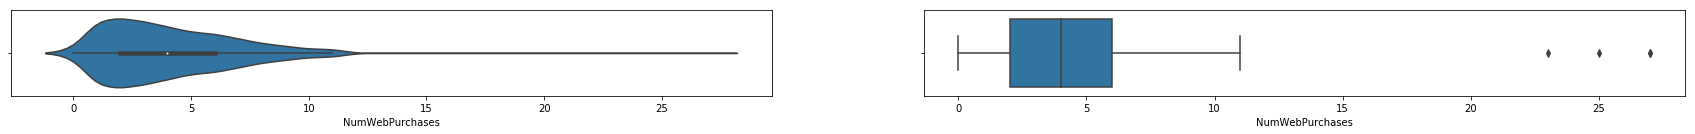

<Figure size 432x288 with 0 Axes>

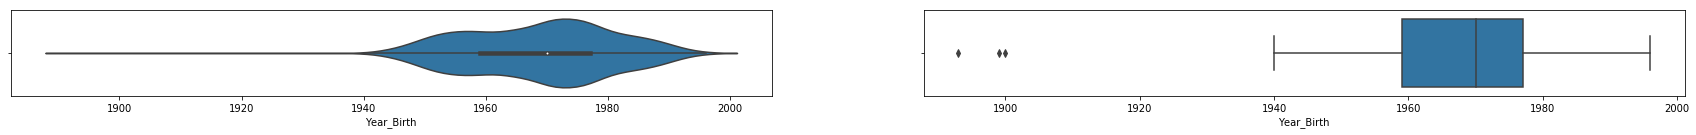

<Figure size 432x288 with 0 Axes>

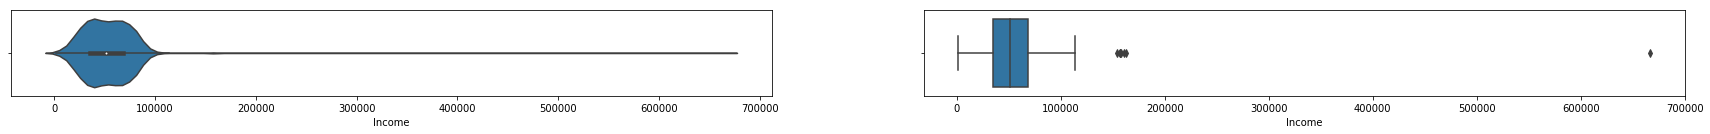

<Figure size 432x288 with 0 Axes>

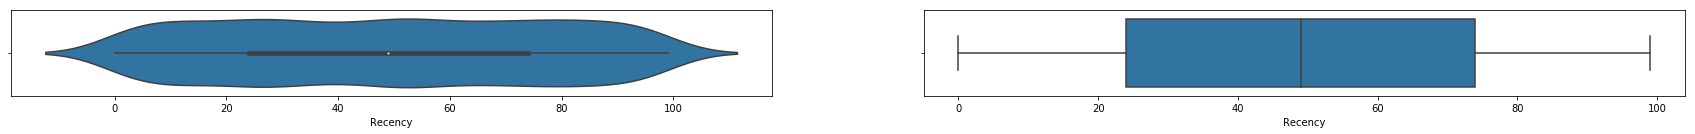

<Figure size 432x288 with 0 Axes>

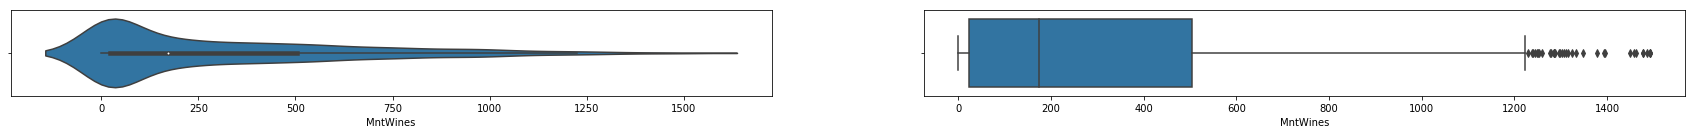

<Figure size 432x288 with 0 Axes>

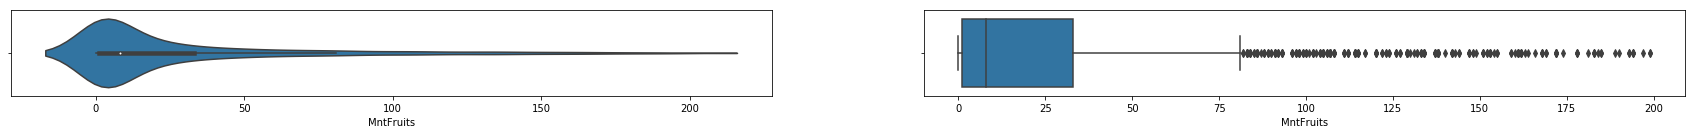

<Figure size 432x288 with 0 Axes>

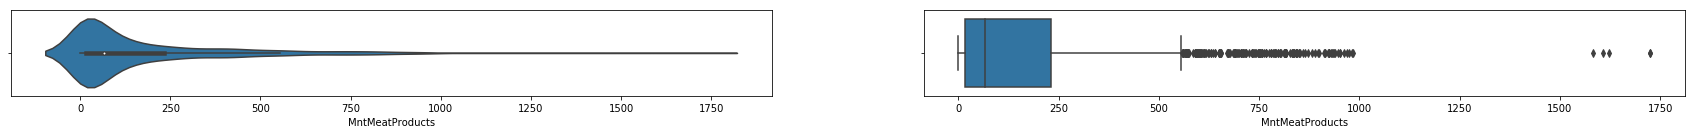

<Figure size 432x288 with 0 Axes>

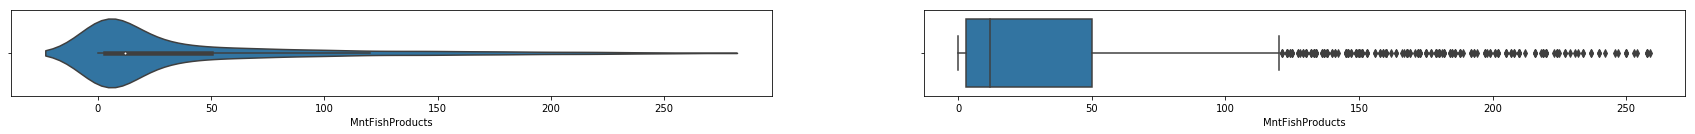

<Figure size 432x288 with 0 Axes>

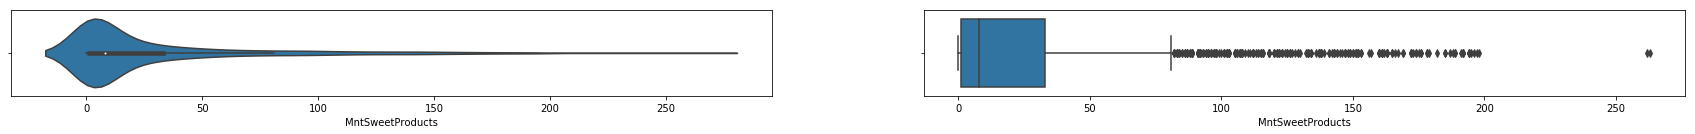

<Figure size 432x288 with 0 Axes>

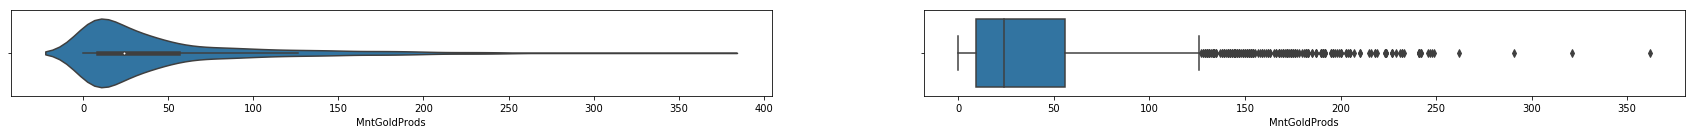

<Figure size 432x288 with 0 Axes>

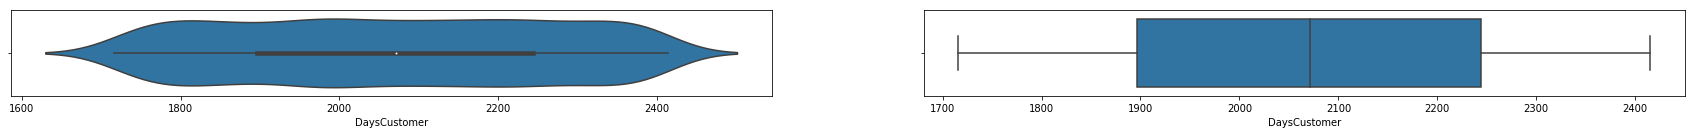

<Figure size 432x288 with 0 Axes>

In [63]:
# Plot distributions
x=0
for i in scale_feat:
    x+=1
    plt.figure(figsize=(30,30))
    plt.subplot(16,2,x)
    sns.violinplot(x=rm_df[i])
    x+=1
    plt.subplot(16,2,x)
    sns.boxplot(x=rm_df[i])
    plt.show()
    plt.clf()

C:\Users\dominika.leszko\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


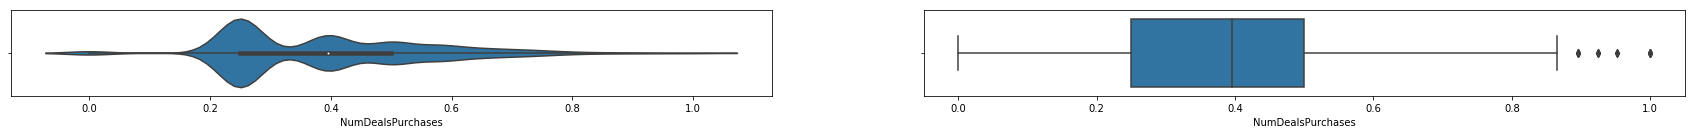

<Figure size 432x288 with 0 Axes>

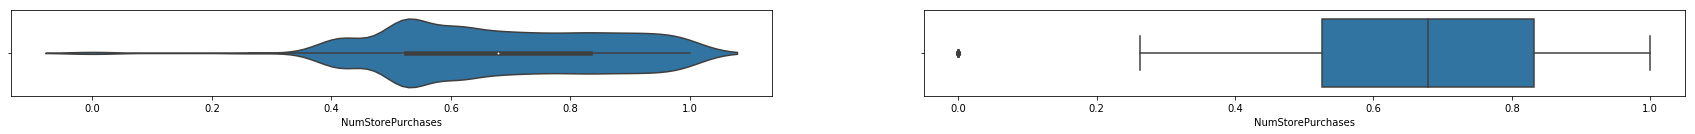

<Figure size 432x288 with 0 Axes>

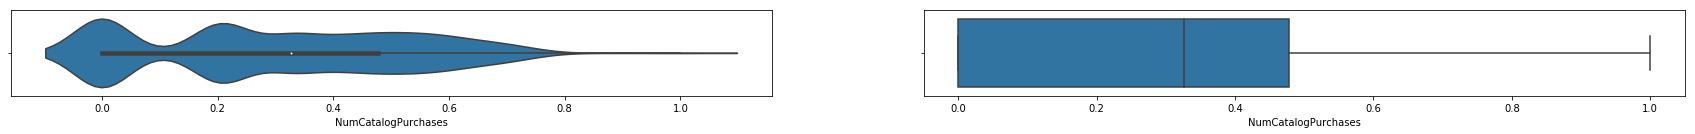

<Figure size 432x288 with 0 Axes>

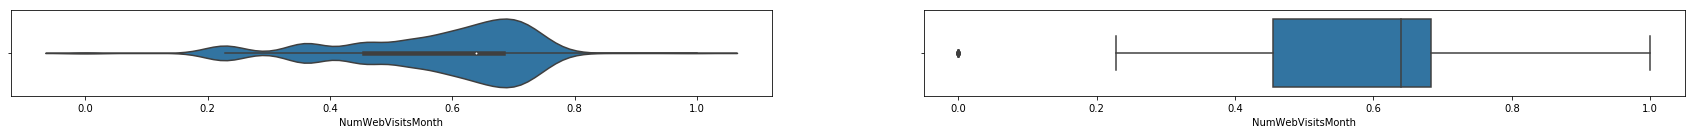

<Figure size 432x288 with 0 Axes>

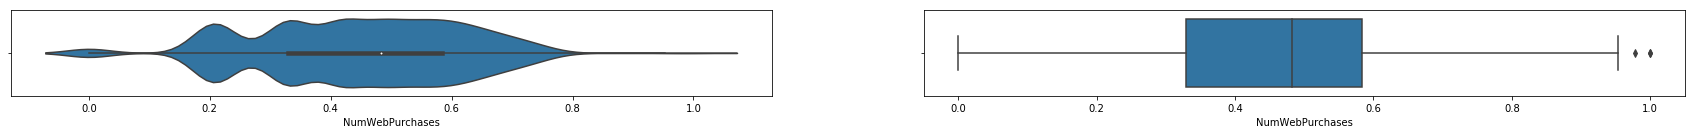

<Figure size 432x288 with 0 Axes>

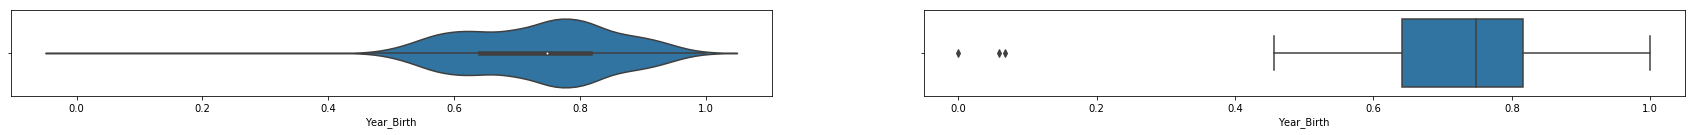

<Figure size 432x288 with 0 Axes>

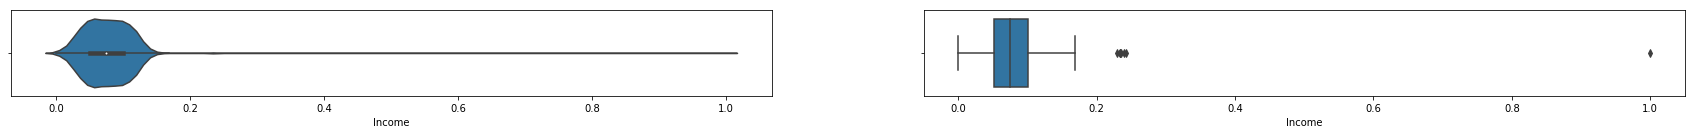

<Figure size 432x288 with 0 Axes>

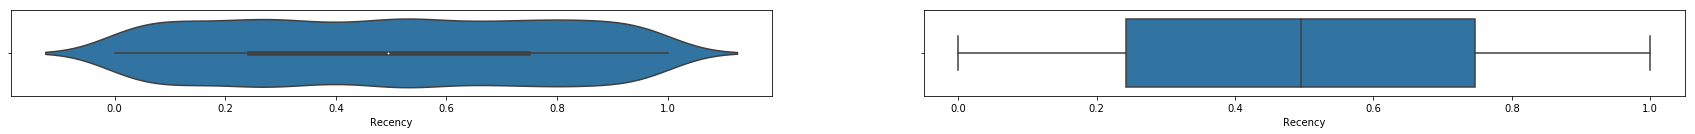

<Figure size 432x288 with 0 Axes>

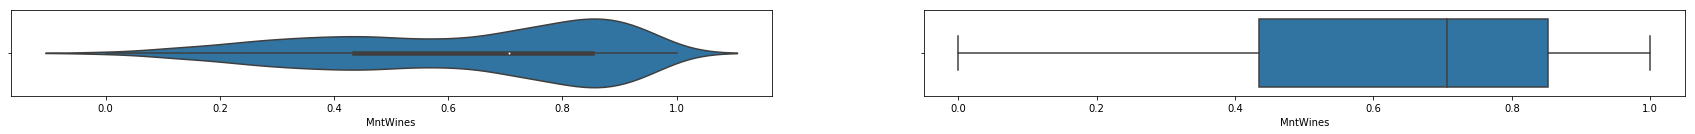

<Figure size 432x288 with 0 Axes>

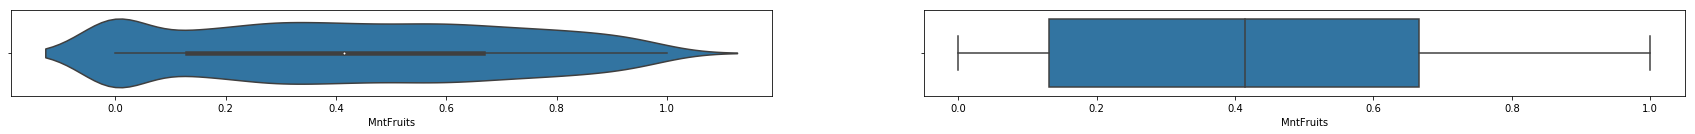

<Figure size 432x288 with 0 Axes>

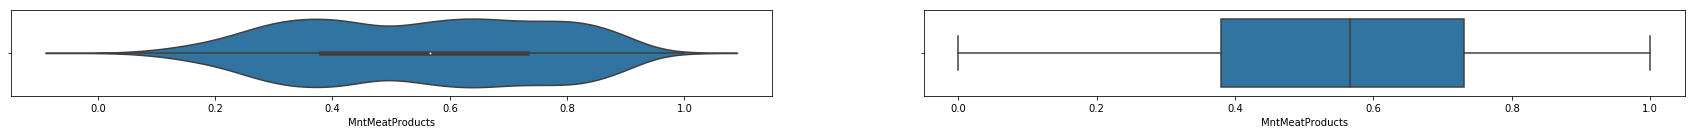

<Figure size 432x288 with 0 Axes>

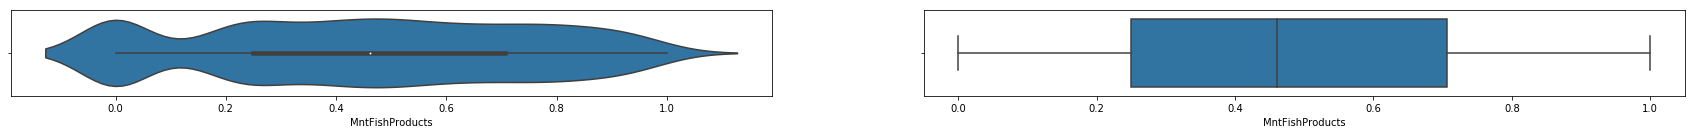

<Figure size 432x288 with 0 Axes>

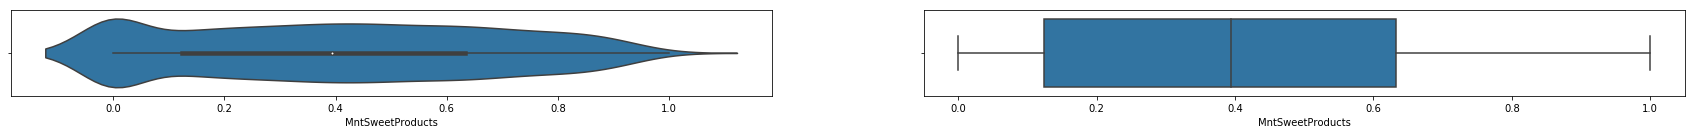

<Figure size 432x288 with 0 Axes>

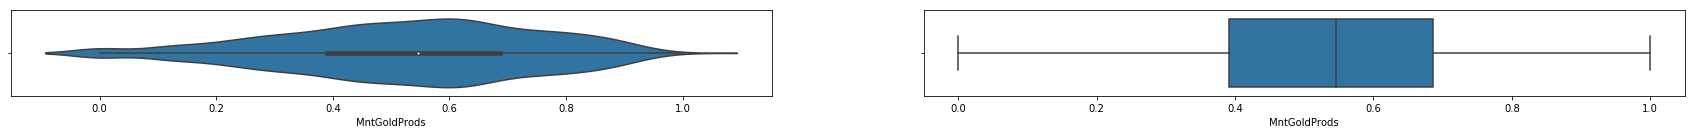

<Figure size 432x288 with 0 Axes>

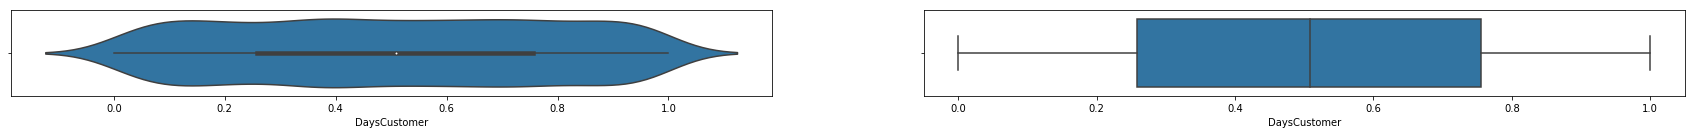

<Figure size 432x288 with 0 Axes>

In [74]:
# Plot distributions AFTER TRANSF
x=0
for i in scale_feat:
    x+=1
    plt.figure(figsize=(30,30))
    plt.subplot(16,2,x)
    sns.violinplot(x=rm_df[i])
    x+=1
    plt.subplot(16,2,x)
    sns.boxplot(x=rm_df[i])
    plt.show()
    plt.clf()

# Log transformation
#Make it more normal (LOG)
to_log=rm_df[[#'Year_Birth',#Looks pretty normal
 #'Income',#Looks pretty normal
 #'Recency',#Its uniform
 'NumDealsPurchases',
    'NumWebVisitsMonth',
    'NumStorePurchases',
    'NumCatalogPurchases',
    'NumWebPurchases',
    'MntWines',
    'MntFruits',
    'MntMeatProducts',
    'MntFishProducts',
    'MntSweetProducts',
    #'DaysCustomer'#Its uniform
    'MntGoldProds']].columns

i=1
for feature in to_log:
    plt.figure(figsize=(40,40))
    plt.subplot(8, 3, i)
    sns.distplot(rm_df[feature].fillna(0), bins=100)
    plt.title(feature)
    i+=2
    #Right sigma: NumDealsPurchases, NumStorePurchases, NumCatalogPurchases,NumWebPurchases, MntWines, MntFruits,
    #MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds

    #NUMBWEBVISITSMONTH - NO SIGMA!!!!!!!!!!! SEE VS LABEL

C:\Users\dominika.leszko\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


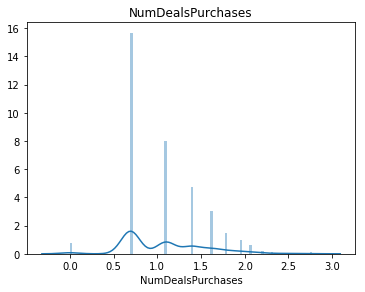

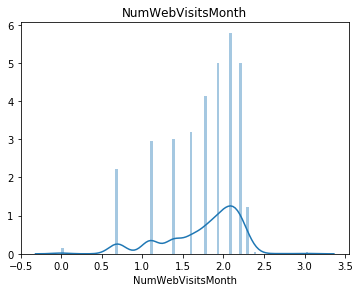

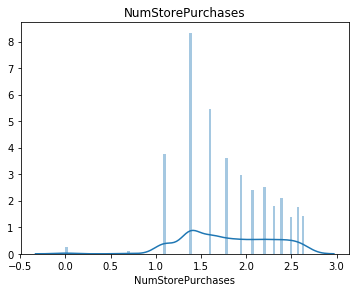

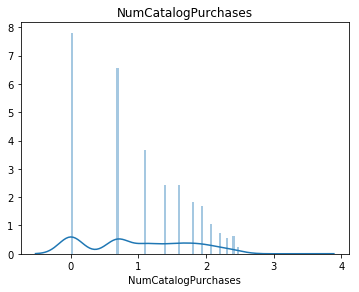

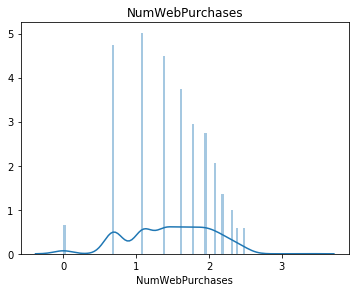

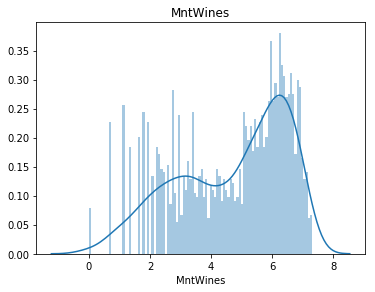

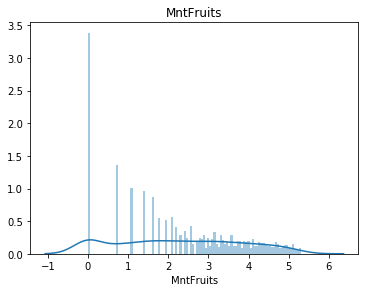

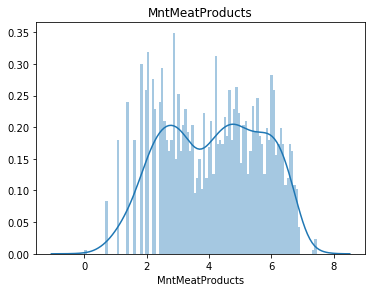

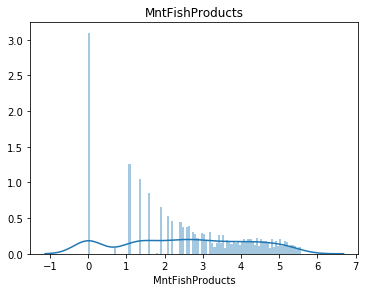

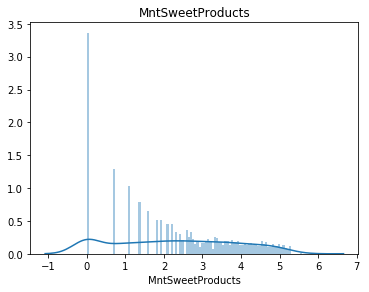

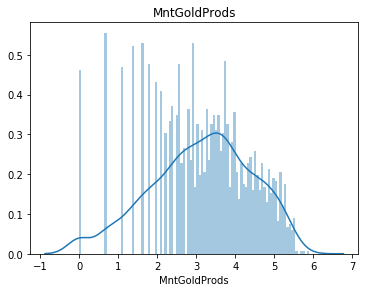

In [65]:
rm_df[to_log]=rm_df[to_log].apply(lambda x:np.log(x+1-min(x)), axis=0)

i=1
for feature in to_log:
    plt.figure(figsize=(20,40))
    plt.subplot(8, 3, i)
    sns.distplot(rm_df[feature].fillna(0), bins=100)
    plt.title(feature)
    i+=1
    

    
#LOG ALL BUT HE ONES WITH MANY 0s


C:\Users\dominika.leszko\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\dominika.leszko\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


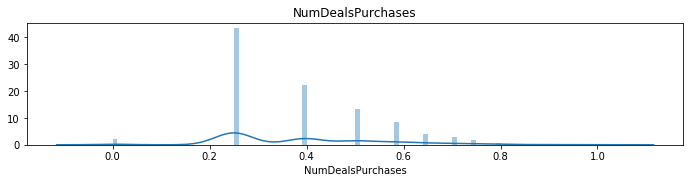

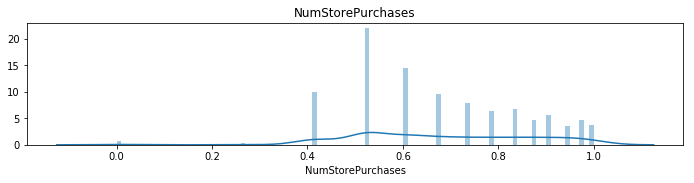

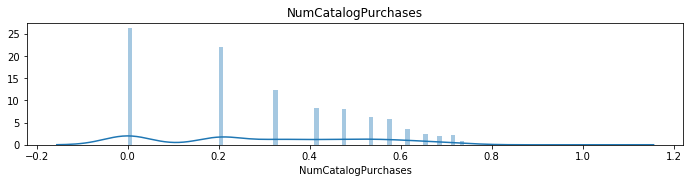

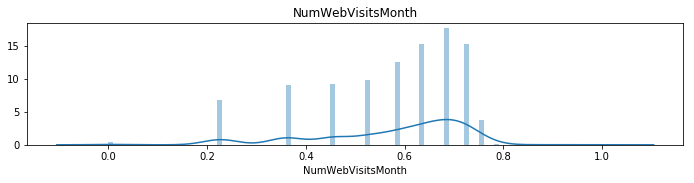

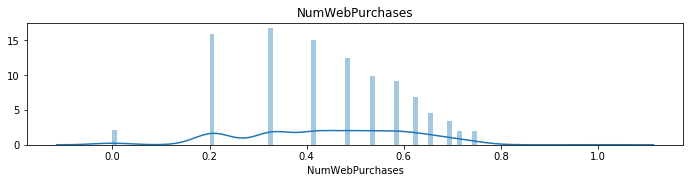

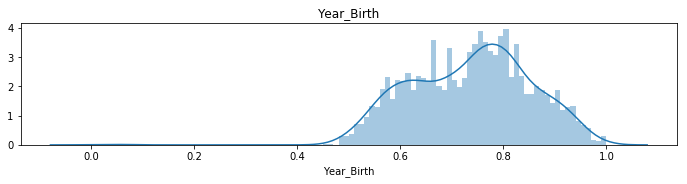

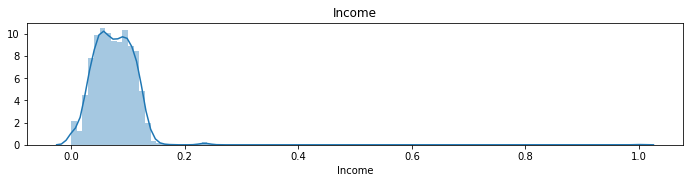

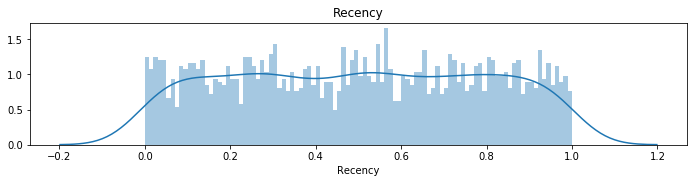

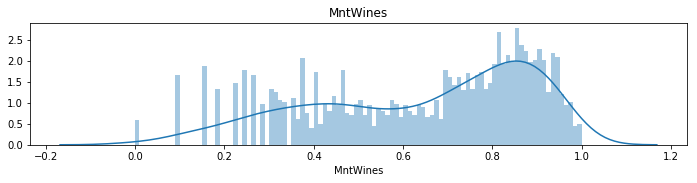

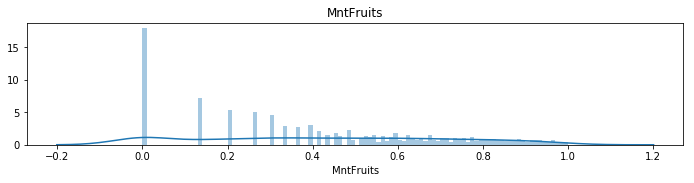

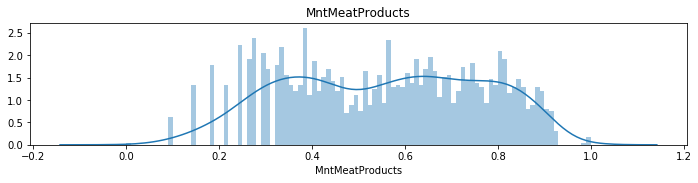

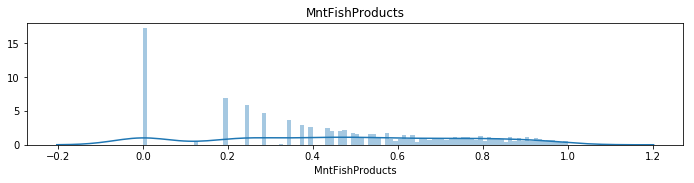

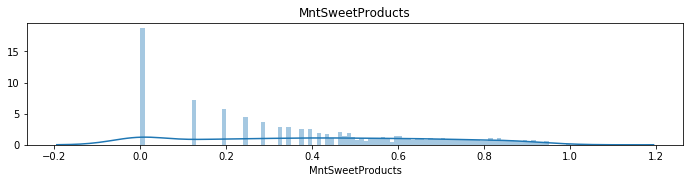

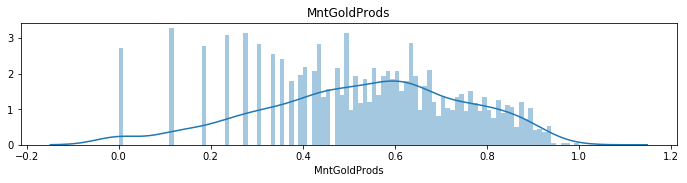

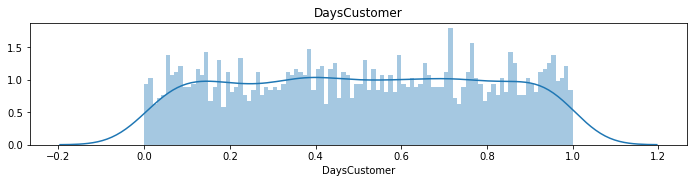

In [66]:
#Scale features
scale_feat=rm_df[['NumDealsPurchases','NumStorePurchases','NumCatalogPurchases', 'NumWebVisitsMonth',
                  'NumWebPurchases',
                    'Year_Birth',
                     'Income',
                     'Recency',
                     'MntWines',
                     'MntFruits',
                     'MntMeatProducts',
                     'MntFishProducts',
                     'MntSweetProducts',
                     'MntGoldProds',
                     'DaysCustomer']].columns


from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1), copy=False)
rm_df[scale_feat]=scaler.fit_transform(rm_df[scale_feat])


i=1
for feature in scale_feat:
    plt.figure(figsize=(40,40))
    plt.subplot(15, 3, i)
    sns.distplot(rm_df[feature].fillna(0), bins=100)
    plt.title(feature)
    i+=3

In [67]:
rm_df.columns#education, marital status, kidhome, teenhome,Dt_Customer, Accepted, Complain

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'DaysCustomer'],
      dtype='object')

In [68]:
#Remaining:
#Binary:Education, Marital_Status, Kidhome, Teenhome, 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
#       'AcceptedCmp2', 'Complain', 'Response'
rm_df.columns


Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'DaysCustomer'],
      dtype='object')

In [69]:
#Compute missing Income and outliers

In [70]:
#Select columns for sigma rule
for_sigma=rm_df[['Year_Birth',
 'Income',
    'NumDealsPurchases',
    'NumStorePurchases',
    'NumCatalogPurchases',
    'NumWebVisitsMonth',  
    'NumWebPurchases',
 #'Recency',#uniform
 #'MntWines',#skewed ordinal
 #'MntFruits',#skewed ordinal
 'MntMeatProducts',
 #'MntFishProducts',#nominal/skewed
 #'MntSweetProducts',#nominal/skewed
 #'DaysCustomer',#uniform
 'MntGoldProds']]

def _filter_ser_by_std(series_, n_stdev=3.0, print_tresh=False):
    mean_, stdev_ = series_.mean(), series_.std()
    cutoff = stdev_ * n_stdev
    lower_bound, upper_bound = mean_ - cutoff, mean_ + cutoff
    if print_tresh:
        return lower_bound, upper_bound
    return [True if i < lower_bound or i > upper_bound else False for i in series_]

mask=for_sigma.apply(_filter_ser_by_std)
for_sigma[mask]=np.nan


C:\Users\dominika.leszko\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\dominika.leszko\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)


In [71]:
rm_df.iloc[for_sigma[for_sigma[['NumDealsPurchases',
    'NumWebVisitsMonth',
    'NumStorePurchases',
    'NumCatalogPurchases',
    'NumWebVisitsMonth','Year_Birth','Income', 'NumWebPurchases']].isnull().any(axis=1)].index]

Year_Birth   Education Marital_Status    Income  Kidhome  Teenhome  \
9       0.553398         PhD       Together  0.005892        1         1   
10      0.873786  Graduation        Married       NaN        1         0   
21      0.834951  Graduation        Married  0.001078        1         0   
27      0.902913  Graduation         Single       NaN        1         0   
43      0.640777         PhD         Single       NaN        0         0   
48      0.563107  Graduation         Single       NaN        2         1   
58      0.864078  Graduation         Single       NaN        1         0   
71      0.776699    2n Cycle        Married       NaN        1         0   
90      0.621359         PhD        Married       NaN        2         1   
91      0.621359  Graduation         Single       NaN        1         1   
92      0.776699      Master       Together       NaN        0         0   
128     0.660194         PhD        Married       NaN        0         1   
133     0.679612  Graduation        Married       NaN        0         1   
164     0.776699         PhD        Married  0.233877        0         1   
192     0.067961    2n Cycle       Divorced  0.052501        1         0   
239     0.000000    2n Cycle         Single  0.087906        0         1   
287     0.611650      Master       Together  0.073944        1         1   
312     0.932039  Graduation        Married       NaN        0         0   
319     0.747573  Graduation         Single       NaN        1         2   
339     0.058252         PhD       Together  0.123022        0         0   
432     0.718447    2n Cycle       Together  0.098625        1         1   
617     0.805825         PhD       Together  0.241628        1         1   
655     0.796117  Graduation       Divorced  0.228885        0         0   
687     0.864078         PhD        Married  0.239231        0         0   
905     0.815534  Graduation         Single  0.125338        0         0   
975     0.669903  Graduation        Married  0.123298        0         0   
981     0.699029  Graduation       Divorced  0.004709        0         0   
1042    0.951456  Graduation         Single  0.009472        0         0   
1147    0.611650  Graduation       Together  0.079286        1         1   
1161    0.611650  Graduation       Together  0.079286        1         1   
1245    0.757282  Graduation       Divorced  0.000000        0         0   
1300    0.757282      Master       Together  0.234614        1         0   
1379    0.747573      Master       Together       NaN        0         1   
1382    0.631068  Graduation       Together       NaN        1         1   
1383    0.689320    2n Cycle         Single       NaN        1         1   
1386    0.766990         PhD       Together       NaN        1         0   
1503    0.776699      Master        Married  0.078771        1         1   
1524    0.776699  Graduation         Single  0.002665        1         0   
1525    0.805825  Graduation        Married  0.085523        1         1   
1653    0.815534  Graduation       Together  0.233731        0         0   
1773    0.572816         PhD       Together  0.125878        0         0   
1788    0.834951    2n Cycle       Together  0.088894        1         1   
1806    0.708738         PhD         Single  0.008142        0         2   
1846    0.679612         PhD        Married  0.003448        1         1   
1898    0.504854         PhD         Single  0.168443        0         0   
1910    0.650485    2n Cycle       Together  0.136594        0         0   
1955    0.553398         PhD          Widow  0.112961        0         0   
1975    0.737864  Graduation        Married  0.004058        0         1   
2059    0.737864      Master       Together       NaN        1         1   
2061    0.854369         PhD         Single       NaN        1         0   
2078    0.757282  Graduation        Married       NaN        1         1   
2079    0.592233      Master       Together       NaN 

In [72]:
#Verifying number of outliers that were detected
for_sigma.isna().sum()

Year_Birth              3
Income                 32
NumDealsPurchases      14
NumStorePurchases      15
NumCatalogPurchases     3
NumWebVisitsMonth      11
NumWebPurchases         4
MntMeatProducts         0
MntGoldProds            0
dtype: int64

In [73]:
#Compute missing values (and outliers)
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan, strategy='mean')
rm_df[scale_feat]=imputer.fit_transform(rm_df[scale_feat].values)

rm_df.isna().any()

Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Response               False
DaysCustomer           False
dtype: bool

In [29]:
rm_df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'DaysCustomer'],
      dtype='object')

In [ ]:
#Discrimination
#Business Features
#Generate dummies
#rm_df['Education'].value_counts()
for feature in scale_feat:
    plt.figure(figsize=(40,40))
    plt.subplot(21, 3, i)
    sns.boxplot(rm_df[feature].fillna(0))
    plt.title(feature)
    i+=1


In [ ]:
#Discrimination
#Business Features
#Generate dummies
#rm_df['Education'].value_counts()
for feature in scale_feat:
    plt.figure(figsize=(40,40))
    plt.subplot(20, 3, i)
    sns.distplot(rm_df[feature].fillna(0), bins=100)
    plt.title(feature)
    i+=1


In [ ]:
# list_cfeatures = list(rm_df.select_dtypes(include=["object", "category"]).columns)
# list_cfeatures.remove('Dt_Customer')
# list_cfeatures.extend(['Kidhome', 'Teenhome', 'AcceptedCmp3', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp4', 
#                        'AcceptedCmp5','Complain', 'Education'])

list_cfeatures = list(rm_df.select_dtypes(include=["object", "category"]).columns)
list_cfeatures.remove('Dt_Customer')
#list_cfeatures.extend(["Recomendation", "Dependents"])
list_cfeatures.extend([ 'Kidhome','Teenhome', 'AcceptedCmp3', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp4', 'AcceptedCmp5','Complain'])


def describe_cat(df, list_cfeatures, target):
    cat_list = []
    for feature in df[list_cfeatures]:    
        cat_list.append(rm_df.groupby([feature]).agg({target: ['count', "mean"]}))
    return pd.concat(cat_list, axis=0, keys=list_cfeatures)

def categorical_discrimination_plot(df, list_cfeatures, target):
    rm_df_cat = describe_cat(df, list_cfeatures, target)

    cutoff_ = rm_df[target].mean()
    cutoff_list = [cutoff_, cutoff_]
    
    for feature in list_cfeatures:
        df_cat=rm_df_cat.iloc[:, 1][feature].sort_values(ascending=False)
        ax = df_cat.plot.bar(color="gray", title="{}% cutoff line on discrimination ability".format(round(cutoff_*100, 2)), legend=False)
        ax.set_xticklabels(df_cat.index, rotation=60, size=9)      
        ax.set_ylabel("Proportion of respondents")
        ax.set_xlabel(feature)
        ax.plot([-1, len(df_cat)], cutoff_list,'r--', lw=2)
        plt.show()

    
categorical_discrimination_plot(rm_df, list_cfeatures, "Response")

In [ ]:
categorical_discrimination_plot(rm_df, ['Education'], "Response")

In [ ]:
#Merging based on discrimination
rm_df['Education']=rm_df['Education'].apply(lambda x:1 if (x=='PhD') | (x=='Master') else 0)
rm_df["Kidhome"]=rm_df["Kidhome"].apply(lambda x: 1 if x >= 1 else 0)
rm_df["Teenhome"]=rm_df["Teenhome"].apply(lambda x: 1 if x >= 1 else 0)
rm_df["Marital_Status"]=rm_df["Marital_Status"].apply(lambda x:1 if (x=='Married' or x=='Together') else (0 if x=='Single' or x=='Alone' or x=='Widow' or x=='Divorced' else x))
rm_df['AcceptedEver']=rm_df['AcceptedCmp5']+rm_df['AcceptedCmp4']+rm_df['AcceptedCmp3']+rm_df['AcceptedCmp2']+rm_df['AcceptedCmp1']
rm_df['AcceptedEver']=rm_df['AcceptedEver'].apply(lambda x: 1 if x>=1 else 0)

In [ ]:
categorical_discrimination_plot(rm_df, list_cfeatures, "Response")

In [ ]:
scat=rm_df[['Year_Birth',
                     'Income',
                     'Recency',
                     'MntWines',
                     'MntFruits',
                     'MntMeatProducts',
                     'MntFishProducts',
                     'MntSweetProducts',
                     'MntGoldProds',
                     'DaysCustomer','Response']]

sns.pairplot(scat, hue='Response')

In [ ]:
scale_feat=rm_df[['NumDealsPurchases', 'NumWebVisitsMonth','NumStorePurchases','NumCatalogPurchases', 'NumWebPurchases',
                    'Year_Birth',
                     'Income',
                     'Recency',
                     'MntWines',
                     'MntFruits',
                     'MntMeatProducts',
                     'MntFishProducts',
                     'MntSweetProducts',
                     'MntGoldProds',
                     'DaysCustomer']].columns


i=1
for feature in scale_feat:
    plt.figure(figsize=(20,40))
    plt.subplot(15, 1, i)
    sns.distplot(rm_df[feature].fillna(0))
    plt.title(feature)
    i+=1

In [ ]:
pd.set_option('display.max_columns', 500)
rm_df.describe()

In [ ]:
rm_df.info()

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

def chisq_ranker(df, continuous_flist, categorical_flist, target, n_bins=10, binning_strategy="uniform"):
    chisq_dict = {}
    if  continuous_flist:
        bindisc = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', 
                               strategy=binning_strategy)
        for feature in continuous_flist:            
            feature_bin = bindisc.fit_transform(df[feature].values[:, np.newaxis])
            feature_bin = pd.Series(feature_bin[:, 0], index=df.index)
            cont_tab = pd.crosstab(feature_bin, df[target], margins = False)
            chisq_dict[feature] = stats.chi2_contingency(cont_tab.values)[0:2] 
    if  categorical_flist:
        for feature in categorical_flist:  
            cont_tab = pd.crosstab(df[feature], df[target], margins = False)          
            chisq_dict[feature] = stats.chi2_contingency(cont_tab.values)[0:2]       
    
    return chisq_dict

from scipy import stats
continuous_flist = list(rm_df[["Year_Birth", "Income", "DaysCustomer","Recency","MntWines","MntFruits","MntMeatProducts",
                              "MntFishProducts","MntSweetProducts","MntGoldProds"]].columns)
categorical_flist = list(rm_df[["Education","Marital_Status","Kidhome",'Teenhome','NumDealsPurchases','NumWebPurchases',
                               'NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','AcceptedCmp3',
                               'AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Complain', 'AcceptedEver']].columns)

target = "Response"
chisq_rank=chisq_ranker(rm_df, continuous_flist, categorical_flist, target)
chisq_rank

In [ ]:
df_chisq_rank = pd.DataFrame(chisq_rank, index=["Chi-Squared", "p-value"]).transpose()
df_chisq_rank.sort_values("Chi-Squared", ascending=False, inplace=True)
df_chisq_rank["valid"]=df_chisq_rank["p-value"]<=0.05
df_chisq_rank

In [ ]:
colors = {True: 'gray', False: 'lightgray'}
fig, ax = plt.subplots(figsize=(15,10))
df_chisq_rank['Chi-Squared'].plot(ax=ax, kind='bar', color=[colors[i] for i in df_chisq_rank['valid']])
ax.set_title("Features worth by Chi-Squared test statistic")
ax.set_xlabel("Input features")
ax.set_ylabel("Test statistic")
ax.set_xticklabels(df_chisq_rank.index, rotation=70)
ax.legend(["p-value<=0.5"])
plt.show()


In [ ]:
def smd01_plot(df, nfeature_list, target, return_df_smd=True):  
    smd_dict = {"smd0": [], "smd1": [], "smd": []}
    for feature in continuous_flist:
        df_smd = df[[feature, target]]
        mean_feature = df_smd[feature].mean()
        df_smd[feature] = (df_smd[feature].sub(mean_feature)).div(mean_feature) 
        df_smd = df_smd.groupby([target]).agg({feature: "mean"})  
        smd_dict["smd0"].append(df_smd.iloc[0, 0])
        smd_dict["smd1"].append(df_smd.iloc[1, 0])
        smd_dict["smd"].append(df_smd[feature].abs().sum())

    df_smd = pd.DataFrame(smd_dict, index=continuous_flist).sort_values("smd", ascending=False)
    colors, groups = ("gray", "red"), ("non-respondents", "respondents")
    g0, g1 = (df_smd.index, df_smd.iloc[:, 0]), (df_smd.index, df_smd.iloc[:, 1])
    data = (g0, g1)

    fig = plt.figure(figsize=(len(df_smd.index)+5, 6))
    ax = fig.add_subplot(1, 1, 1, facecolor = "1.0")
    for data, color, group in zip(data, colors, groups):    
        X, y = data
        ax.scatter(x=X, y=y.values, s=80, marker="s", label=group, c=color)

    ax.set_title("Scaled Mean Deviation (SMD)")
    ax.set_xlabel("Continuous features")
    ax.set_ylabel("SMD")
    ax.legend()
    plt.xticks(fontsize=9)    
    plt.show()
    
    if return_df_smd:
        return df_smd
    
smd01_plot(rm_df, continuous_flist, 'Response')

In [ ]:
rm_df = pd.read_excel(r"C:\Users\dominika.leszko\Desktop\NOVAIMS\SEMESTER2\Machine Learning\PROJECT\ml_project1_data.xlsx")
display(rm_df.head(3))
#print(rm_df.info(), "\nResponse rate: {}%".format(round(100*rm_df["DepVar"].mean(), 2)))

#1 Drop useless values
rm_df.drop(rm_df[(rm_df['Marital_Status']=='YOLO') | (rm_df['Marital_Status']=='Absurd')].index, axis=0, inplace=True)

#2 Drop constant features and ID
num_df=rm_df._get_numeric_data().drop(['Response'], axis=1)
const=list(num_df.columns[num_df.std()<0.01])
const.append('ID')
rm_df.drop(labels=const, axis=1, inplace=True)

#Calculate days_since_customer
def days_since(series, ref_date):
    import datetime
    ser = rm_df['Dt_Customer'].apply(lambda i:datetime.datetime.strptime(i, '%Y-%m-%d').date())
    ser = ser.apply(func = lambda x: (ref_date-x).days)    
    return ser

rm_df["DaysCustomer"] = days_since(rm_df['Dt_Customer'], datetime.date(2019,3,11))
#rm_df.loc[:, ["DaysCustomer", 'Dt_Customer']].head(3)

#Compute age
def _comp_age(birth):
    import datetime
    rm_df['CustAge']=datetime.datetime.now().year-rm_df['Year_Birth']
    




In [ ]:
#Log transformation
#Make it more normal (LOG)
to_log=rm_df[[#'Year_Birth',#Looks pretty normal
 #'Income',#Looks pretty normal
 #'Recency',#Its uniform
 'NumDealsPurchases',
    'NumWebVisitsMonth',
    'NumStorePurchases',
    'NumCatalogPurchases',
    'NumWebPurchases',
    'MntWines',
    'MntFruits',
    'MntMeatProducts',
    'MntFishProducts',
    'MntSweetProducts',
    #'DaysCustomer'#Its uniform
    'MntGoldProds']].columns

i=1
for feature in to_log:
    plt.figure(figsize=(20,40))
    plt.subplot(15, 1, i)
    sns.distplot(rm_df[feature].fillna(0))
    plt.title(feature)
    i+=1


In [ ]:
from scipy.stats import boxcox
data=rm_df[to_log].apply(lambda x:x+1)
#lambda = 0.5 is a square root transform.
data1=boxcox(data, 0)
data2=boxcox(data,0.5)


In [ ]:
sns.distplot(rm_df['NumDealsPurchases'])

#FOR RIGHT SIGMA RULE:
#NumDealsPurchases, NumStorePurchases, NumCatalogPurchases, MntWines, MntFruits, MntMeatProducts, MntFishProducts,MntSweetProducts,
#MntGoldProds


# n_bins=3
# bindisc = KBinsDiscretizer(n_bins=3, encode='ordinal', 
#                                strategy='uniform')
# feature_bin = bindisc.fit_transform(rm_df['Year_Birth'].values[:, np.newaxis])
# feature_bin = pd.Series(feature_bin[:, 0], index=rm_df.index)

# print("Parameters of discretizer: ", bindisc.get_params())
# print("Thresholds for {} bins of {}: ".format(n_bins, 'Year_Birth'), bindisc.bin_edges_)

# cont_tab = pd.crosstab(feature_bin, rm_df['Response'], margins = False)

# cont_tab


In [ ]:
from scipy.stats import boxcox
data=rm_df['MntGoldProds'].apply(lambda x:x+1)
data1=boxcox(data, 0)
data2=boxcox(data,0.5)

In [ ]:
sns.distplot(data1)

In [ ]:
sns.distplot(data2)

In [ ]:
data3=np.log(rm_df['MntWines']+1-min(rm_df['MntWines']))
sns.distplot(data3)

In [ ]:
i=1
for feature in data2:
    plt.figure(figsize=(20,40))
    plt.subplot(11, 1, i)
    sns.distplot(data1[i])
    plt.title(feature)
    i+=1

In [ ]:
from scipy.stats import boxcox
data=rm_df['Income'].apply(lambda x:x+1)
data1=boxcox(data, 0)
data2=boxcox(data,0.5)
data3=boxcox(data)

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(data3[0], bins=100)

In [ ]:
from scipy import stats
#stats.norm.rvs(loc=5, scale=3, size=100)
stats.shapiro(data1)

In [ ]:
sns.distplot(boxcox(data[:1100])[0])

In [ ]:
sns.distplot(rm_df['MntSweetProducts'],bins=100)

In [ ]:
rm_df['MntSweetProducts'].value_counts().sort_index()

In [ ]:
#Conclusions:
#For continuous variables use all but Year_Birth
#For categorical use all but complain
#For Accepted used AcceptedEver
#Feature engineer: web purchase frequency = NumWebPurchases/NumWebvisits, hasdependents (kid/teen), numofdependants (kid+teen),
#haskids, hasteens; numofkids, numofteens
kor=rm_df.corr()
plt.figure(figsize=(60,30))
sns.heatmap(kor, annot=True)

In [ ]:
kor=rm_df.drop(['AcceptedCmp1','AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Teenhome', 'Kidhome',
               'AcceptedEver', 'Complain'], axis=1).corr()
plt.figure(figsize=(60,30))
sns.heatmap(kor, annot=True, cmap='coolwarm')